# 2.5 数组的计算: 广播

## 2.5.1 广播的介绍

In [1]:
import numpy as np

In [2]:
a = np.array([0, 1, 2])
b = np.array([5, 5, 5])
a + b

array([5, 6, 7])

In [3]:
a + 5

array([5, 6, 7])

In [4]:
M = np.ones((3, 3))
M

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [5]:
M + a

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

In [6]:
a = np.arange(3)
b = np.arange(3)[:, np.newaxis]

print(a)
print(b)

[0 1 2]
[[0]
 [1]
 [2]]


In [7]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

## 2.5.2 广播的规则

### 1. 广播示例1

In [8]:
M = np.ones((2, 3))
a = np.arange(3)

In [9]:
M + a

array([[1., 2., 3.],
       [1., 2., 3.]])

### 2. 广播示例2

In [10]:
a = np.arange(3).reshape((3, 1))
b = np.arange(3)

In [11]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

### 3. 广播示例3

In [12]:
M = np.ones((3, 2))
a = np.arange(3)

In [13]:
M + a

ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

In [14]:
a[:, np.newaxis].shape

(3, 1)

In [15]:
M + a[:, np.newaxis]

array([[1., 1.],
       [2., 2.],
       [3., 3.]])

In [16]:
np.logaddexp(M, a[:, np.newaxis])

array([[1.31326169, 1.31326169],
       [1.69314718, 1.69314718],
       [2.31326169, 2.31326169]])

### 2.5.3 广播的实际应用

### 1. 数组的归一化

In [17]:
X = np.random.random((10, 3))

In [18]:
Xmean = X.mean(0)
Xmean

array([0.37405841, 0.39373718, 0.52784325])

In [19]:
X_centered = X - Xmean

In [20]:
X_centered.mean(0)

array([-1.11022302e-17, -3.33066907e-17,  2.22044605e-17])

### 2. 画一个二维函数

In [21]:
# x和y表示0-5区间50个步长的序列
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)[:, np.newaxis]
z = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt

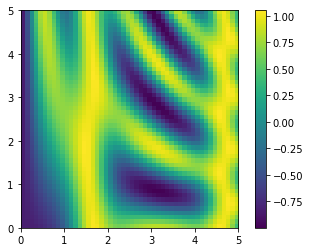

In [23]:
plt.imshow(z, origin='lower', extent=[0, 5, 0, 5], cmap='viridis')
plt.colorbar();